<center><h1>Preprocess and Clean Data</h1></center>
<center><h6>Including feature engineering</h6></center>
    
This notebook is the second step in our **Airbnb Smart Pricing project** ETL pipeline. As observed from the data, several columns are either irrelevant or contain inconsistencies such as missing values, irrelevant columns. To prepare the dataset for analysis and modeling, we will perform a thorough data cleaning and preprocessing step. This includes selecting relevant features, handling missing values with appropriate strategies, converting fields to usable formats, and creating simple derived features such as the number of amenities. Finally, we will have a merged dataset ready for downloading, which can be used for modeling purpose.

In [68]:
# Load necessary libraries
import os

import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.preprocessing import StandardScaler

In [69]:
# Load processed data (from previous step)
listings = pd.read_csv("../data/processed/listings.csv")
calendar = pd.read_csv("../data/processed/calendar.csv")
reviews = pd.read_csv("../data/processed/reviews.csv")

<ipython-input-69-ef08f58560de>:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



#### Starting with listings.csv

In [110]:
# Select relevant columns
columns = ['id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price', 'minimum_nights', 'availability_30', 'number_of_reviews', 
    'review_scores_rating', 'instant_bookable', 'amenities']
listings_clean = listings[columns].copy()

In [111]:
# Changing price to float type
listings_clean['price'] = listings_clean['price'].replace('[\$,]', '', regex=True).astype(float)

# Map t -> 1 and f-> 0
binary_cols = ['instant_bookable']
for col in binary_cols:
    if col in listings_clean.columns:
        listings_clean[col] = listings_clean[col].map({'t': 1, 'f': 0})
        
categorical_cols = ['room_type', 'property_type', 'neighbourhood_cleansed']
listings_clean = pd.get_dummies(listings_clean, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", listings_clean.shape)
listings_clean.head()

Shape after encoding: (36125, 127)


,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_North Shore Oahu,neighbourhood_cleansed_Paia-Haiku,neighbourhood_cleansed_Primary Urban Center,neighbourhood_cleansed_Puna,neighbourhood_cleansed_South Hilo,neighbourhood_cleansed_South Kohala,neighbourhood_cleansed_South Kona,neighbourhood_cleansed_Waianae,neighbourhood_cleansed_Wailuku-Kahului,neighbourhood_cleansed_Waimea-Kekaha
0,5269,7620,20.02740,-155.70200,2,1.0,1.0,1.0,128.0,3,...,False,False,False,False,False,True,False,False,False,False
1,5387,7878,19.43081,-155.88069,2,1.0,0.0,2.0,97.0,5,...,False,False,False,False,False,False,True,False,False,False
2,5480,8145,19.44149,-154.91527,2,1.0,1.0,1.0,117.0,2,...,False,False,False,True,False,False,False,False,False,False
3,5532,8279,21.58225,-158.13614,4,NaN,2.0,NaN,NaN,7,...,True,False,False,False,False,False,False,False,False,False
4,7888,22083,19.51225,-154.91020,4,0.0,1.0,1.0,98.0,1,...,False,False,False,True,False,False,False,False,False,False


In [112]:
# Handle missing values
for col in [listings_clean.select_dtypes(include=['number']).columns.tolist()]:
    listings_clean[col] = listings_clean[col].fillna(listings_clean[col].median())

In [113]:
# Add amenities count
def count_amenities(amenities):
    if pd.isna(amenities):
        return 0
    return len(amenities.split(','))

listings_clean['amenities_count'] = listings_clean['amenities'].apply(count_amenities)
listings_clean.drop(columns=['amenities'], inplace=True)

In [114]:
# Show first 5 observations
listings_clean.head(5)

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_Paia-Haiku,neighbourhood_cleansed_Primary Urban Center,neighbourhood_cleansed_Puna,neighbourhood_cleansed_South Hilo,neighbourhood_cleansed_South Kohala,neighbourhood_cleansed_South Kona,neighbourhood_cleansed_Waianae,neighbourhood_cleansed_Wailuku-Kahului,neighbourhood_cleansed_Waimea-Kekaha,amenities_count
0,5269,7620,20.02740,-155.70200,2,1.0,1.0,1.0,128.0,3,...,False,False,False,False,True,False,False,False,False,37
1,5387,7878,19.43081,-155.88069,2,1.0,0.0,2.0,97.0,5,...,False,False,False,False,False,True,False,False,False,35
2,5480,8145,19.44149,-154.91527,2,1.0,1.0,1.0,117.0,2,...,False,False,True,False,False,False,False,False,False,4
3,5532,8279,21.58225,-158.13614,4,1.0,2.0,2.0,280.0,7,...,False,False,False,False,False,False,False,False,False,38
4,7888,22083,19.51225,-154.91020,4,0.0,1.0,1.0,98.0,1,...,False,False,True,False,False,False,False,False,False,33


In [115]:
print("Listings shape:", listings.shape)
print(listings_clean.info(), '\n')

Listings shape: (36125, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Columns: 127 entries, id to amenities_count
dtypes: bool(112), float64(7), int64(8)
memory usage: 8.0 MB
None 



In [116]:
# Checking statistics for numerical variables
round(listings_clean.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,36125.0,5.309623e+17,5.083067e+17,5269.00,39096065.00,6.449960e+17,9.929016e+17,1.369922e+18
host_id,36125.0,1.906042e+08,1.829314e+08,908.00,37839136.00,1.134417e+08,3.631940e+08,6.838864e+08
latitude,36125.0,2.092000e+01,8.100000e-01,18.92,20.69,2.096000e+01,2.132000e+01,2.223000e+01
longitude,36125.0,-1.572300e+02,1.290000e+00,-159.72,-157.84,-1.566900e+02,-1.564300e+02,-1.548400e+02
accommodates,36125.0,4.770000e+00,2.410000e+00,1.00,4.00,4.000000e+00,6.000000e+00,1.600000e+01
bathrooms,36125.0,1.550000e+00,8.700000e-01,0.00,1.00,1.000000e+00,2.000000e+00,1.400000e+01
bedrooms,36125.0,1.600000e+00,1.130000e+00,0.00,1.00,1.000000e+00,2.000000e+00,2.400000e+01
beds,36125.0,2.490000e+00,1.450000e+00,0.00,2.00,2.000000e+00,3.000000e+00,3.200000e+01
price,36125.0,4.407500e+02,9.488500e+02,1.00,193.00,2.800000e+02,4.160000e+02,2.501000e+04
minimum_nights,36125.0,9.220000e+00,3.060000e+01,1.00,1.00,2.000000e+00,4.000000e+00,1.000000e+03


In [117]:
# Counting the missing values
nans = listings_clean.isna().sum().sort_values(ascending = False)
pct = (nans/listings_clean.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                                         NaN Values Count  \
id                                                      0   
property_type_Shared room                               0   
property_type_Tipi                                      0   
property_type_Tiny home                                 0   
property_type_Tent                                      0   
...                                                   ...   
property_type_Entire serviced apartment                 0   
property_type_Entire resort                             0   
property_type_Entire rental unit                        0   
property_type_Entire place                              0   
amenities_count                                         0   

                                         NaN Values Percentage (%)  
id                                                             0.0  
property_type_Shared room                                      0.0  
property_type_Tipi                                          

In [118]:
# Checking for duplicated rows
listings_clean.duplicated().any()

False

#### Now working on calendar.csv

In [119]:
# Convert date and price to appropriate data types
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Filter out rows with null prices (e.g., unavailable listings)
calendar = calendar[~calendar['price'].isna()]

# Aggregate to get average price & availability per listing
calendar_agg = calendar.groupby('listing_id').agg({
    'price': 'mean',
    'available': lambda x: (x == 't').sum() / len(x)  # availability ratio
}).reset_index().rename(columns={'listing_id': 'id', 'price': 'avg_price_calendar', 'available': 'availability_ratio'})

In [120]:
# Show first 5 observations
calendar_agg.head(5)

,id,avg_price_calendar,availability_ratio
0,5269,185.0,0.946381
1,5387,92.0,0.684932
2,5480,134.0,1.000000
3,5532,175.0,0.000000
4,7888,68.0,0.736986


In [121]:
print("Calendar shape:", calendar_agg.shape)
print(calendar_agg.info(), '\n')

Calendar shape: (36125, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36125 non-null  int64  
 1   avg_price_calendar  36125 non-null  float64
 2   availability_ratio  36125 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 846.8 KB
None 



In [122]:
# Checking statistics for numerical variables
round(calendar_agg.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,36125.0,5.309623e+17,5.083067e+17,5269.0,39096065.0,6.449960e+17,9.929016e+17,1.369922e+18
avg_price_calendar,36125.0,6.877600e+02,1.922100e+03,0.0,183.0,2.890000e+02,5.000000e+02,6.923000e+04
availability_ratio,36125.0,5.600000e-01,3.200000e-01,0.0,0.3,6.300000e-01,8.300000e-01,1.000000e+00


In [123]:
# Counting the missing values
nans = calendar_agg.isna().sum().sort_values(ascending = False)
pct = (nans/calendar_agg.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                    NaN Values Count  NaN Values Percentage (%)
id                                 0                        0.0
avg_price_calendar                 0                        0.0
availability_ratio                 0                        0.0


In [124]:
# Checking for duplicated rows
calendar_agg.duplicated().any()

False

#### Lastly reviews.csv

In [125]:
# Convert date
reviews['date'] = pd.to_datetime(reviews['date'])

# Compute review count and recency per listing
review_agg = reviews.groupby('listing_id').agg({
    'date': ['count', 'max']
})

review_agg.columns = ['review_count', 'last_review_date']
review_agg = review_agg.reset_index().rename(columns={'listing_id': 'id'})

# Convert recency into "days since last review"
latest_date = reviews['date'].max()
review_agg['days_since_last_review'] = (latest_date - review_agg['last_review_date']).dt.days
review_agg.drop(columns=['last_review_date'], inplace=True)

In [126]:
# Show first 5 observations
review_agg.head(5)

,id,review_count,days_since_last_review
0,5269,40,18
1,5387,231,60
2,7888,128,2855
3,7896,92,28
4,13238,183,49


In [127]:
print("Reviews shape:", review_agg.shape)
print(review_agg.info(), '\n')

Reviews shape: (28065, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28065 entries, 0 to 28064
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      28065 non-null  int64
 1   review_count            28065 non-null  int64
 2   days_since_last_review  28065 non-null  int64
dtypes: int64(3)
memory usage: 657.9 KB
None 



In [128]:
# Checking statistics for numerical variables
round(review_agg.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,28065.0,4.232250e+17,4.815705e+17,5269.0,32168909.0,52903248.0,8.647431e+17,1.365608e+18
review_count,28065.0,4.839000e+01,7.943000e+01,1.0,4.0,18.0,5.800000e+01,1.410000e+03
days_since_last_review,28065.0,2.270800e+02,3.899100e+02,0.0,21.0,58.0,2.440000e+02,4.397000e+03


In [129]:
# Counting the missing values
nans = review_agg.isna().sum().sort_values(ascending = False)
pct = (nans/review_agg.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                        NaN Values Count  NaN Values Percentage (%)
id                                     0                        0.0
review_count                           0                        0.0
days_since_last_review                 0                        0.0


In [130]:
# Checking for duplicated rows
review_agg.duplicated().any()

False

#### Now merging all the datasets

In [148]:
# Merge listings with calendar
df_merged = pd.merge(listings_clean, calendar_agg, on='id', how='left')

# Merge with reviews
df_merged = pd.merge(df_merged, review_agg, on='id', how='left')

# Final missing value handling (post-merge)
df_merged['avg_price_calendar'] = df_merged['avg_price_calendar'].fillna(df_merged['price'])
df_merged['availability_ratio'] = df_merged['availability_ratio'].fillna(df_merged['availability_30'] / 30)
df_merged['review_count'] = df_merged['review_count'].fillna(0)
df_merged['days_since_last_review'] = df_merged['days_since_last_review'].fillna(df_merged['days_since_last_review'].max())

# Dropping irrelevant columns
columns_to_drop = ['id', 'host_id', 'number_of_reviews']
df_merged.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [149]:
# Show first 5 observations
df_merged.head(5)

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,review_scores_rating,...,neighbourhood_cleansed_South Kohala,neighbourhood_cleansed_South Kona,neighbourhood_cleansed_Waianae,neighbourhood_cleansed_Wailuku-Kahului,neighbourhood_cleansed_Waimea-Kekaha,amenities_count,avg_price_calendar,availability_ratio,review_count,days_since_last_review
0,20.02740,-155.70200,2,1.0,1.0,1.0,128.0,3,8,4.78,...,True,False,False,False,False,37,185.0,0.946381,40.0,18.0
1,19.43081,-155.88069,2,1.0,0.0,2.0,97.0,5,2,4.67,...,False,True,False,False,False,35,92.0,0.684932,231.0,60.0
2,19.44149,-154.91527,2,1.0,1.0,1.0,117.0,2,30,4.89,...,False,False,False,False,False,4,134.0,1.000000,0.0,4397.0
3,21.58225,-158.13614,4,1.0,2.0,2.0,280.0,7,0,4.89,...,False,False,False,False,False,38,175.0,0.000000,0.0,4397.0
4,19.51225,-154.91020,4,0.0,1.0,1.0,98.0,1,30,4.65,...,False,False,False,False,False,33,68.0,0.736986,128.0,2855.0


In [150]:
print("Merged dataset shape:", df_merged.shape)
print(df_merged.info(), '\n')

Merged dataset shape: (36125, 128)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Columns: 128 entries, latitude to days_since_last_review
dtypes: bool(112), float64(11), int64(5)
memory usage: 8.3 MB
None 



In [151]:
# Counting the missing values
nans = df_merged.isna().sum().sort_values(ascending = False)
pct = (nans/df_merged.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                                         NaN Values Count  \
latitude                                                0   
longitude                                               0   
neighbourhood_cleansed_East Honolulu                    0   
property_type_Yurt                                      0   
property_type_Treehouse                                 0   
...                                                   ...   
property_type_Entire villa                              0   
property_type_Entire vacation home                      0   
property_type_Entire townhouse                          0   
property_type_Entire serviced apartment                 0   
days_since_last_review                                  0   

                                         NaN Values Percentage (%)  
latitude                                                       0.0  
longitude                                                      0.0  
neighbourhood_cleansed_East Honolulu                        

In [152]:
num_features=df_merged.select_dtypes(include=['number']).columns

# Calculate the IQR for each feature to identify outliers
Q1 = df_merged[num_features].quantile(0.25)
Q3 = df_merged[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for feature in num_features:
    df_merged = df_merged[(df_merged[feature] >= lower_bound[feature]) & (df_merged[feature] <= upper_bound[feature])]
    
df_merged.shape

(12219, 128)

In [153]:
# Plot mapbox for location and price
fig = px.scatter_mapbox(
    df_merged,
    lat='latitude',
    lon='longitude',
    color='price',
    hover_data=['review_scores_rating']
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [155]:
# Apply scaling
num_features=num_features.drop(['price'])
scaler = StandardScaler()
df_merged[num_features] = scaler.fit_transform(df_merged[num_features])

In [157]:
# Checking statistics for numerical variables
round(df_merged.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
latitude,12219.0,-0.00,1.00,-2.35,-0.68,0.15,0.46,1.72
longitude,12219.0,0.00,1.00,-1.78,-0.49,-0.24,0.86,1.97
accommodates,12219.0,-0.00,1.00,-2.17,-0.19,-0.19,1.13,3.11
bathrooms,12219.0,-0.00,1.00,-2.42,-0.70,-0.70,1.02,3.60
bedrooms,12219.0,-0.00,1.00,-1.72,-0.40,-0.40,0.91,2.22
beds,12219.0,-0.00,1.00,-1.37,-0.26,-0.26,0.85,1.96
price,12219.0,299.28,137.89,14.00,203.00,280.00,365.00,750.00
minimum_nights,12219.0,0.00,1.00,-0.85,-0.85,-0.25,0.35,3.34
availability_30,12219.0,-0.00,1.00,-1.04,-0.80,-0.23,0.46,2.42
review_scores_rating,12219.0,0.00,1.00,-2.46,-0.68,0.27,0.96,0.96


In [158]:
# Dropping irrelevant columns
columns_to_drop = ['room_type']
df_merged.drop(columns=columns_to_drop, inplace=True, errors='ignore')

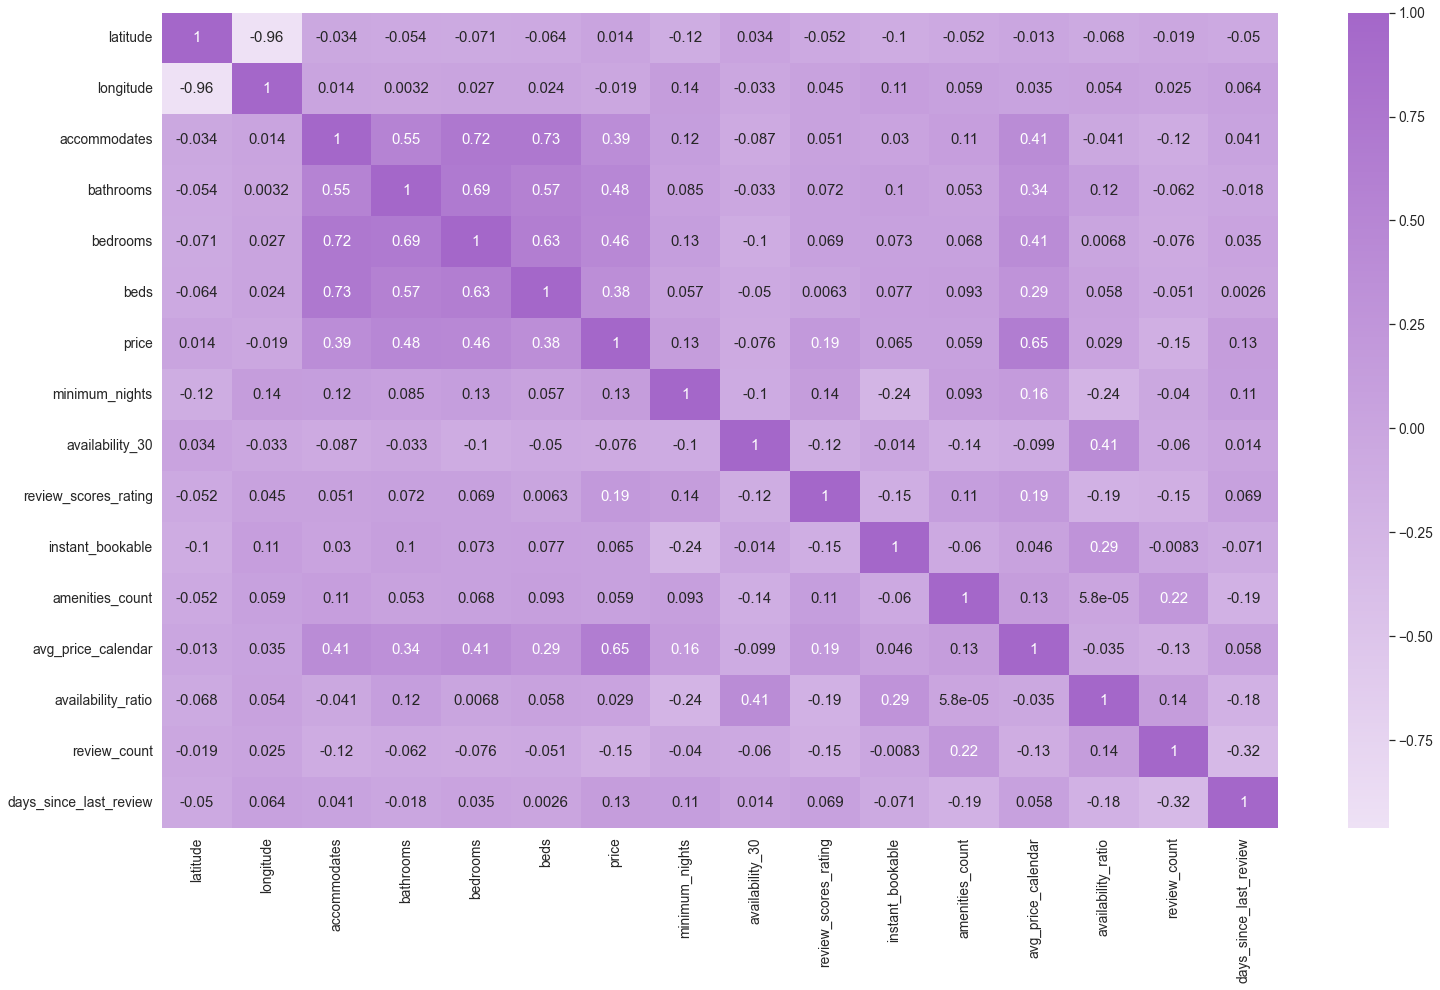

In [159]:
# Create correlation matrix
numerical_columns=df_merged.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(25,15))
sns.set(font_scale=1.25)
sns.heatmap(df_merged[numerical_columns].corr(), annot=True, cmap=LinearSegmentedColormap.from_list("lavender", ["#eee1f5", "#a467c9"]))
plt.show()

In [160]:
# Convert all boolean columns to integers (True → 1, False → 0) for modeling purposes
bool_cols = df_merged.select_dtypes(include='bool').columns
df_merged[bool_cols] = df_merged[bool_cols].astype(int)

In [161]:
# Save for next steps
df_merged.to_csv("../data/processed/airbnb_preprocessed.csv", index=False)

print("Preprocessing complete. Saved merged dataset with shape:", df_merged.shape)

Preprocessing complete. Saved merged dataset with shape: (12219, 128)
